# Desarrollo de IA directamente sin preentrenado

Librerias

In [1]:
import matplotlib.pyplot as plt
import os
import  cv2
from sklearn import metrics
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input,LeakyReLU
from keras import backend as K
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import seaborn as sns



In [2]:
#dataset = keras.preprocessing.image_dataset_from_directory(
 # '/Users/elgem/Desktop/cammlx90640', image_size=(240, 320))

In [3]:
#for data, labels in dataset:
   #print(data.shape)  # (64,)
   #print(data.dtype)  # string
   #print(labels.shape)  # (64,)
   #print(labels.dtype)  # int32

In [4]:
#y = np.array(labels)
#X = np.array(data, dtype=np.uint8) #convierto de lista a numpy

iniciamos el directorio de la data set y los vectores de imagenes, dirfectorio y numero dentro de los directorios

In [2]:
dirname = os.path.join(os.getcwd(), '/Users/elgem/Desktop/cammlx90640')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 


leemos las imagenes

In [3]:
import re


print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:/Users/elgem/Desktop/cammlx90640\
c:/Users/elgem/Desktop/cammlx90640\ambiente 1
c:/Users/elgem/Desktop/cammlx90640\objetos 999
c:/Users/elgem/Desktop/cammlx90640\persona 1000
Directorios leidos: 3
Imagenes en cada directorio [1000, 1000, 1000]
suma Total de imagenes en subdirs: 3000


In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  3000
0 ambiente
1 objetos
2 persona
Total number of outputs :  3
Output classes :  [0 1 2]


In [5]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (2400, 240, 320, 3) (2400,)
Testing data shape :  (600, 240, 320, 3) (600,)


In [ ]:
train_Y

array([2, 1, 1, ..., 1, 2, 2])

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

 
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = keras.utils.to_categorical(train_Y)
test_Y_one_hot = keras.utils.to_categorical(test_Y)
 
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Original label: 1
After conversion to one-hot: [0. 1. 0.]
(1920, 240, 320, 3) (480, 240, 320, 3) (1920, 3) (480, 3)


In [ ]:
train_Y_one_hot

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

# Configuracion de  red neuronal

In [7]:
INIT_LR = 1e-3
epochs = 6
batch_size = 64

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(240,320,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5)) 

model.add(Dense(nClasses, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 320, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 240, 320, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 160, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 120, 160, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 160, 32)      18464     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 120, 160, 32)      0         
                                                        

C:\Users\elgem\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


# entrenando red neuronal

In [8]:
hist=model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
 

Epoch 1/6
30/30 [==============================] - 121s 4s/step - loss: 1.0919 - accuracy: 0.4693 - val_loss: 0.8431 - val_accuracy: 0.7688
Epoch 2/6
30/30 [==============================] - 112s 4s/step - loss: 0.6728 - accuracy: 0.7505 - val_loss: 0.5301 - val_accuracy: 0.8479
Epoch 3/6
30/30 [==============================] - 111s 4s/step - loss: 0.3809 - accuracy: 0.8833 - val_loss: 0.2798 - val_accuracy: 0.9375
Epoch 4/6
30/30 [==============================] - 110s 4s/step - loss: 0.2401 - accuracy: 0.9312 - val_loss: 0.1866 - val_accuracy: 0.9604
Epoch 5/6
30/30 [==============================] - 113s 4s/step - loss: 0.1715 - accuracy: 0.9484 - val_loss: 0.1360 - val_accuracy: 0.9563
Epoch 6/6
30/30 [==============================] - 130s 4s/step - loss: 0.1305 - accuracy: 0.9573 - val_loss: 0.1088 - val_accuracy: 0.9646


# se guarda red neuronal

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
model.save("mnist.h5py")

INFO:tensorflow:Assets written to: mnist.h5py\assets


INFO:tensorflow:Assets written to: mnist.h5py\assets


# Estats

Text(0.5, 0, 'epoch')

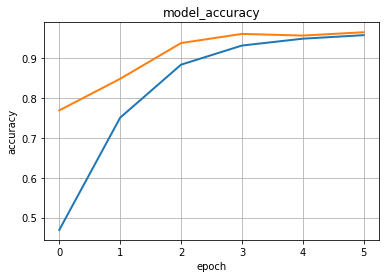

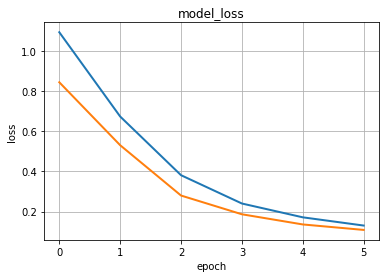

In [9]:
#total de aciertos
plt.figure()
plt.grid()
plt.plot(hist.history['accuracy'],lw=2)
plt.plot(hist.history['val_accuracy'],lw=2)
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

#total de perdida
plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=2)
plt.plot(hist.history['val_loss'],lw=2)
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [36]:
prueba=ypred[:600]
len(prueba)

600

In [39]:
ypred=model.predict(test_X);
ypred=ypred.ravel()>0.5

#metricas
print('Metricas: \n', metrics.classification_report(test_Y,ypred[:600]))

#matriz de confusión
print('Matriz de confusión: \n',metrics.confusion_matrix(test_Y,ypred[:600]))

19/19 [==============================] - 8s 395ms/step
Metricas: 
               precision    recall  f1-score   support

           0       0.30      0.66      0.41       180
           1       0.37      0.35      0.36       213
           2       0.00      0.00      0.00       207

    accuracy                           0.32       600
   macro avg       0.22      0.34      0.26       600
weighted avg       0.22      0.32      0.25       600

Matriz de confusión: 
 [[119  61   0]
 [139  74   0]
 [144  63   0]]


C:\Users\elgem\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elgem\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elgem\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Matriz de confusion')

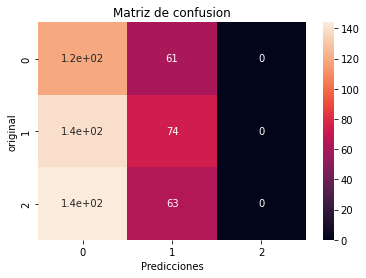

In [40]:
cm=metrics.confusion_matrix(test_Y,ypred[:600])
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("Predicciones")
ax.set_ylabel("original")
ax.set_title("Matriz de confusion")

# Pruebas

1/1 [==============================] - 0s 53ms/step


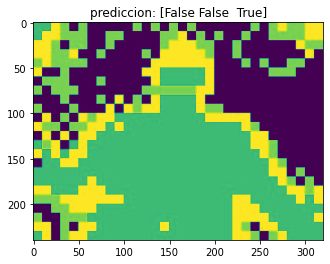

In [25]:
patron= test_X[np.random.randint(0,600)].reshape(1,240,320,3)

number=model.predict(patron);
number=number.ravel()>0.5


plt.imshow(patron[0,:,:,0])
plt.title('prediccion: ' +str(number))
plt.show()


# para cargar modelo

In [ ]:
#model=keras.models.load_model('mnist.h5py')

# aparte #